In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data= pd.read_csv('marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
numerical = data.select_dtypes([np.number])
categoricals = data.select_dtypes(include=['object'])
    

In [8]:
labelencoder = LabelEncoder()
for col in categoricals:
    categoricals[col] = labelencoder.fit_transform(categoricals[col])
categoricals

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,600,4,0,0,0,47,1,0,1,1,0,2,0,0,5,1
1,5946,0,0,1,0,24,4,0,1,2,1,5,2,0,0,1
2,96,2,0,2,0,41,1,0,1,1,1,5,0,0,5,1
3,8016,1,0,0,0,12,4,1,1,1,0,1,0,2,3,1
4,2488,4,0,0,0,52,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3857,1,0,0,0,32,1,1,2,1,1,3,1,3,0,1
9130,5390,1,1,1,1,34,1,0,1,0,0,2,0,1,0,1
9131,6688,1,0,1,0,55,4,1,1,2,0,1,0,1,0,1
9132,7214,1,0,1,1,52,1,1,1,1,1,4,2,1,0,0


In [9]:
data = pd.concat([numerical, categoricals], axis=1)
data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer,State,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274,69,32,5,0,1,384.811147,600,4,...,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,94,13,42,0,8,1131.464935,5946,0,...,4,0,1,2,1,5,2,0,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,96,2,...,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,106,18,65,0,7,529.881344,8016,1,...,4,1,1,1,0,1,0,2,3,1
4,2813.692575,43836,73,12,44,0,1,138.130879,2488,4,...,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,3857,1,...,1,1,2,1,1,3,1,3,0,1
9130,3096.511217,21604,79,14,28,0,1,379.200000,5390,1,...,1,0,1,0,0,2,0,1,0,1
9131,8163.890428,0,85,9,37,3,2,790.784983,6688,1,...,4,1,1,2,0,1,0,1,0,1
9132,7524.442436,21941,96,34,3,0,3,691.200000,7214,1,...,1,1,1,1,1,4,2,1,0,0


In [10]:
X = numerical.drop(['Total Claim Amount'], axis=1)
y = numerical['Total Claim Amount']


In [11]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state=0, train_size = .75)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Customer Lifetime Value  Income  Monthly Premium Auto  \
7414              5313.467001       0                    79   
1292             11009.130490   51643                   283   
5108              2744.083863   79192                    70   
7628              3063.114594       0                    95   
2735             14566.092460   52564                   122   
...                       ...     ...                   ...   
4373              7786.676381   83000                    97   
7891              4995.171200   10787                    71   
4859              8114.409136   30595                    69   
3264             12904.943360   27778                   109   
2732              7664.219255   60184                   199   

      Months Since Last Claim  Months Since Policy Inception  \
7414                        4                             78   
1292                       16                             43   
5108                       11                      

In [12]:
lm = LinearRegression().fit(X, y)

In [13]:
 r_sq = lm.score(X, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {lm.intercept_}")
print(f"coefficients: {lm.coef_}")


coefficient of determination: 0.5186628226558787
intercept: 72.39096819184186
coefficients: [-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]


In [14]:
z_pred = lm.predict(X)
print(f"predicted response:\n{z_pred}")

predicted response:
[248.90222187 565.67760682 474.06635556 ... 512.28386782 503.42179961
 472.60712499]


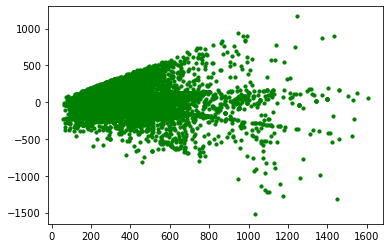

In [15]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

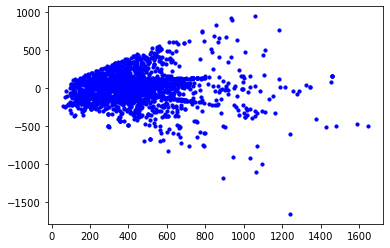

In [16]:
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

In [17]:
predictions = lm.predict(X)

rmse = mean_squared_error(y, predictions, squared=False) 
mae = mean_absolute_error(y, predictions)


print("R2_score:", round(lm.score(X,y),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.52
RMSE: 201.53347925902824
MAE: 144.38290074277205
